## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>

<p><strong>The Office!</strong> Ce a inceput ca o serie britanica mockumentary despre cultura biroului in 2001, a dus la zece alte variante in intreaga lume, inclusiv o versiune israeliana (2010-13), o versiune hindi (2019-), si chiar o varianta franco-canadiana (2006-2007). Din toate aceste iteratii (inclusiv originalul), seria americana a fost cea mai lunga, acoperind 201 episoade in noua sezoane.</p>

<p>In acest notebook, vom analiza un set de date cu episoade din The Office, si vom incerca sa intelegem cum a variat popularitatea si calitatea seriei in timp. Pentru a face acest lucru, vom folosi urmatorul set de date: <code>datasets/office_episodes.csv</code>, care a fost descarcat de pe Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">aici</a>.</p>
<p>Acest set de date contine informatii despre o varietate de caracteristici ale fiecarui episod. In detaliu, acestea sunt:
<br></p>
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Numarul episodului.</li>
    <li><b>season:</b> Sezonul in care a aparut episodul.</li>
    <li><b>episode_title:</b> Titlul episodului.</li>
    <li><b>description:</b> Descrierea episodului.</li>
    <li><b>ratings:</b>  Ratingul mediu IMDB.</li>
    <li><b>votes:</b> Numarul de voturi.</li>
    <li><b>viewership_mil:</b> Numarul de vizualizatori din SUA in milioane.</li>
    <li><b>duration:</b> Durata in numar de minute.</li>
    <li><b>release_date:</b>  Data difuzarii.</li>
    <li><b>guest_stars:</b> Vedete invitate special in episod (daca exista).</li>
    <li><b>director:</b> Regizorul episodului.</li>
    <li><b>writers:</b> Scriitorii episodului.</li>
    <li><b>has_guests:</b> True/False pentru a indica daca episodul contine vedete invitate special.</li>
    <li><b>scaled_ratings:</b> Rating-urile scalate de la 0 (cele mai slab evaluate) la 1 (cele mai bine evaluate).</li>
</ul>
    </div>

## INSTRUCTIUNI
<p>Vizualizarea datelor este adesea o modalitate excelentă de a începe să explorati datele. În acest caiet de lucru, veți iniția acest proces prin crearea unui grafic informativ al datelor episodului. În acest sens, veți lucra cu mai multe variabile diferite, inclusiv numărul episodului, audiența, rating-ul fanilor și aparițiile oaspetilor. Aici sunt cerințele necesare pentru a trece acest proiect:<p>

<p> 1. Creați un grafic scatter <code>matplotlib</code> al datelor care conține următoarele atribute:

- Numărul fiecărui episod trasat de-a lungul axei x
- Audiența fiecărui episod (în milioane) trasat de-a lungul axei y
- Un sistem de culori care reflectă rating-urile scalate (nu rating-urile obișnuite) ale fiecărui episod, astfel:
         - Rating-uri <0,25 sunt colorate "red"
         - Rating-urile >=0,25 și <0,50 sunt colorate "orange"
         - Rating-urile >=0,50 și <0,75 sunt colorate "lightgreen"
         - Rating-urile >=0,75 sunt colorate "darkgreen"
- Un sistem de dimensiune, astfel încât episodul care are un invitat special să aibă o dimensiune de marcator de 250 și episodul fără să fie dimensionat la 25
- Un titlu, <code>"Popularity, Quality, and Guest Appearances on the Office"</code>
- O etichetă de axă x, <code>"Episode Number"</code>
- O etichetă de axă y, <code>"Viewership (Millions)"</code></p>
<p>2. Furnizați numele unuia dintre actorii oaspeti (indicație, au existat mai multi!) care au fost în episodul Office cel mai urmărit. Salvati-l ca un șir în variabila top_star (de exemplu top_star = "Will Ferrell").</p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

office_episodes_df=pd.read_csv("office_episodes.csv")
office_episodes_df.head()



,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [3]:
colors=[]

for lab,row in office_episodes_df.iterrows():
    if row["scaled_ratings"]<0.25:
        colors.append("red")
    elif row["scaled_ratings"]>=0.25 and row["scaled_ratings"]<0.5:
        colors.append("orange")
    elif row["scaled_ratings"]>=0.5 and row["scaled_ratings"]<0.75:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")
colors[:10]
        

['orange',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen']

In [5]:
size=[]

for lab,row in office_episodes_df.iterrows():
    if row["has_guests"]==True:
        size.append(250)
    else:
        size.append(25)
size[:10]

[25, 25, 25, 25, 25, 250, 25, 25, 250, 250]

Text(0, 0.5, 'Viewership(Millions)')

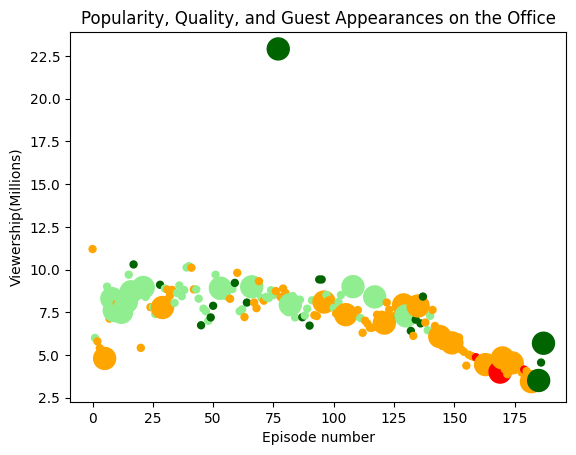

In [6]:
plt.scatter(office_episodes_df["episode_number"],office_episodes_df["viewership_mil"],c=colors,s=size)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode number")
plt.ylabel("Viewership(Millions)")

In [10]:
highest_view=max(office_episodes_df["viewership_mil"])

most_watch_df=office_episodes_df.loc[office_episodes_df["viewership_mil"]==highest_view]

top_star=most_watch_df[["guest_stars"]]
top_star

,guest_stars
77,"Cloris Leachman, Jack Black, Jessica Alba"


In [9]:
top_star="Jessica Alba"